In [11]:
import sys, os
sys.path.insert(0, os.path.abspath('../code'))
from estimators import *
from plotting import *
from drivers import *
import numpy as np 
#Auto reload local updates made to library 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We run our debiased method Algorithm 4 (red) and leverage score sampling (blue) to find polynomial approximations of indicator functions under different distributions $\mu$, across a variety of sample complexities $n$, repeated for 1,000 trials. The first and third plots use degree $d=10$, while the second and fourth plots use degree $d=30$. We report the relative error $\varepsilon_{\text{empirical}}$. 
$$\varepsilon_{\rm \text{empirical}}=\frac{\mathbb{E}_{t\sim\mu}\bigl[|\hat p(t) - f(t)|^2\bigr]}{\mathbb{E}_{t\sim\mu}\bigl[|p^*(t) - f(t)|^2\bigr]}-1,$$


---

**First two plots**: When $\mu$ is the uniform distribution on $[-1,1]$, we take $f(t)=\mathbb{1}{t\in[-0.5,0.5]}$. 

---

**Last two plots:** When $\mu$ is the Gaussian distribution $\mathcal{N}(0,1)$, we take $f(t)=\mathbb{1}{t\in[-1,1]}$. Our method outperforms leverage score sampling in all regimes, and has an especially large edge when we have low sample complexity (say, $n\le 3d$). Shaded areas show $10%$ and $90%$ quantiles.

In [3]:
def f1(t, thresh=.5): #Indicator on [-.5,.5]
    t = np.asarray(t, dtype=float)
    return (np.abs(t) <= thresh).astype(float)
    
res4_unif = run_experiment4(
    f1,
    d_values=(10, 15, 20),
    n_runs=1000,
    interval=(-1, 1),
    measure="uniform",
    quad_deg_proj=128,
    quad_deg_err=128,
    verbose=True
)
def f2(t, thresh=1): #Indicator on [-1,1]
    t = np.asarray(t, dtype=float)
    return (np.abs(t) <= thresh).astype(float)
    
res4_gauss = run_experiment4(
    f2,
    d_values=(10, 15, 20),
    n_runs=1000,
    interval=(-5, 5),
    measure="gaussian",
    quad_deg_proj=128,
    quad_deg_err=128,
    verbose=True
)


 d=10, baseline ‖f−p*‖₂ = 2.101e-01


d=10 samples: 100%|██████████| 17/17 [02:47<00:00,  9.83s/it]



 d=15, baseline ‖f−p*‖₂ = 1.872e-01


d=15 samples: 100%|██████████| 15/15 [03:09<00:00, 12.63s/it]



 d=20, baseline ‖f−p*‖₂ = 1.587e-01


d=20 samples: 100%|██████████| 14/14 [03:28<00:00, 14.88s/it]



 d=10, baseline ‖f−p*‖₂ = 2.063e-01


d=10 samples: 100%|██████████| 17/17 [01:36<00:00,  5.67s/it]



 d=15, baseline ‖f−p*‖₂ = 1.905e-01


d=15 samples: 100%|██████████| 15/15 [01:34<00:00,  6.28s/it]



 d=20, baseline ‖f−p*‖₂ = 1.564e-01


d=20 samples: 100%|██████████| 14/14 [01:34<00:00,  6.77s/it]


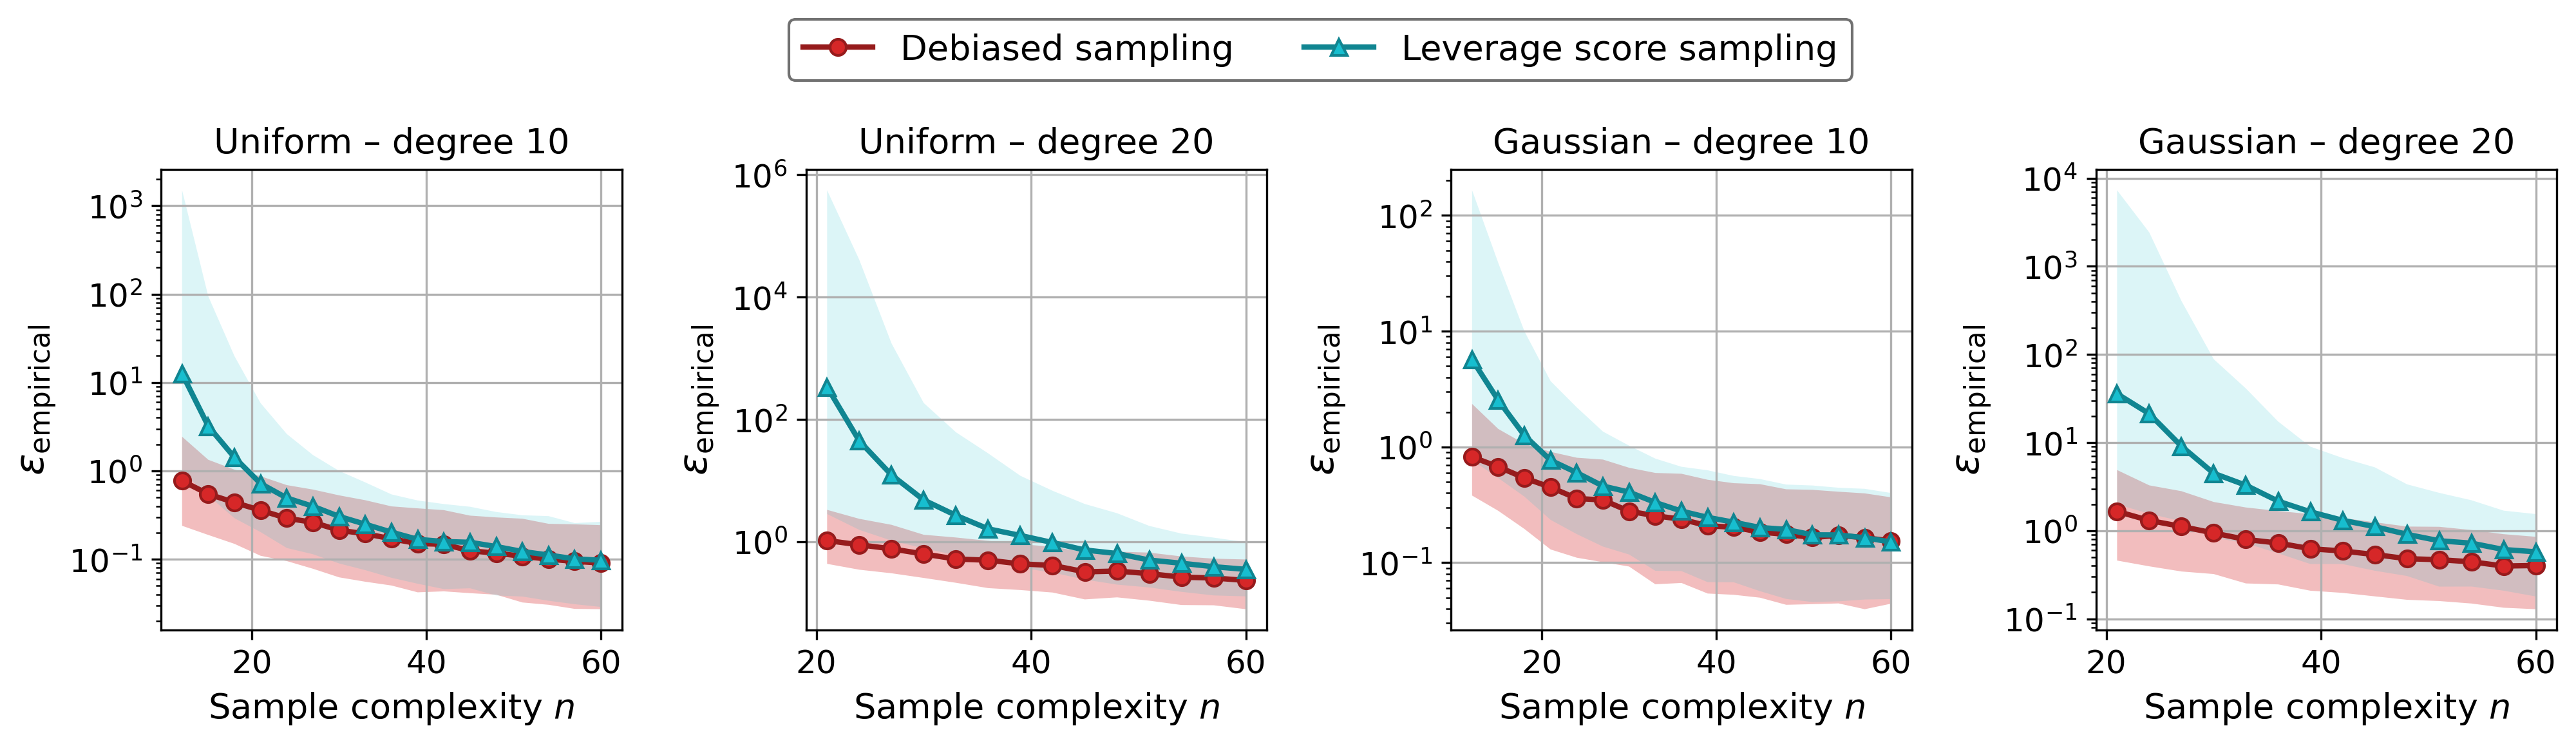

In [14]:
plot_figure3(
    res4_unif,
    res4_gauss,
    save_path="temp2x22",
    label_fontsize=13,
    tick_fontsize=12,
    legend_fontsize=13,
    line_thickness=2
)
